#POSTTEST 7 KB
Nama : Rafly Genta Pratama

NIM : 2209106022

Kelas : Informatika A22 (A1)

#Link Dataset:

https://www.kaggle.com/datasets/yapwh1208/cats-breed-dataset

#Mengekstrak Dataset Citra

In [2]:
!unzip '/content/drive/MyDrive/Kecerdasan Buatan/archive_4.zip'

Archive:  /content/drive/MyDrive/Kecerdasan Buatan/archive_4.zip
  inflating: cat_v1/bengal/00438-Bengal-cat-snarling.jpg  
  inflating: cat_v1/bengal/00441-Very-timid-Brown-Spotted-Bengal-cat-ears-back.jpg  
  inflating: cat_v1/bengal/00e79f939696ea0c095603154c4af840.jpg  
  inflating: cat_v1/bengal/03915-Pair-of-Bengal-kittens-white-background.jpg  
  inflating: cat_v1/bengal/04413-Bengal-cat-white-background.jpg  
  inflating: cat_v1/bengal/047ffa2f7165ccc4585e418ddb800299.jpg  
  inflating: cat_v1/bengal/05050-Brown-spotted-Bengal-cat-sitting-on-grey-background.jpg  
  inflating: cat_v1/bengal/09a0c5d574f818471c84cf509fc786dc.jpg  
  inflating: cat_v1/bengal/0c87060cea587a01f0a254066c95deaa.jpg  
  inflating: cat_v1/bengal/106f59608bc9fc6ac11df31008efdf94.jpg  
  inflating: cat_v1/bengal/1096165.jpg  
  inflating: cat_v1/bengal/1111246.jpg  
  inflating: cat_v1/bengal/1113154.jpg  
  inflating: cat_v1/bengal/1142194.jpg  
  inflating: cat_v1/bengal/119mokiL1.jpg  
  inflating: cat_

#Membagi File

In [3]:
!pip install split-folders
import splitfolders

splitfolders.ratio("/content/cat_v1",
                   output= "dataset_final",
                   seed = 1337,
                   ratio = (.8, .1, .1))

Copying files: 953 files [00:01, 588.64 files/s]


#Mengimport Library

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Memuat Data Menggunakan ImageDataGenerator

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [6]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

#Membuat Sequential Model

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])


#Mengcompile model dengan accuracy sebagai metriks

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Split data menjadi train, val, test

In [9]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset_final/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '/content/dataset_final/val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = validation_datagen.flow_from_directory(
    '/content/dataset_final/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 758 images belonging to 5 classes.
Found 93 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


#Training Model Menggunakan Callback

In [11]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=15, monitor='accuracy', min_delta = 0.01, verbose = 1),
]

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
24/24 [==============================] - 92s 4s/step - loss: 1.0202 - accuracy: 0.5594 - val_loss: 1.2902 - val_accuracy: 0.4194
Epoch 2/100
24/24 [==============================] - 85s 4s/step - loss: 1.0306 - accuracy: 0.5686 - val_loss: 1.3918 - val_accuracy: 0.4516
Epoch 3/100
24/24 [==============================] - 91s 4s/step - loss: 1.0415 - accuracy: 0.5712 - val_loss: 1.2582 - val_accuracy: 0.4301
Epoch 4/100
24/24 [==============================] - 92s 4s/step - loss: 1.0340 - accuracy: 0.5805 - val_loss: 1.2504 - val_accuracy: 0.5054
Epoch 5/100
24/24 [==============================] - 86s 4s/step - loss: 1.0180 - accuracy: 0.5554 - val_loss: 1.2316 - val_accuracy: 0.5484
Epoch 6/100
24/24 [==============================] - 88s 4s/step - loss: 1.0342 - accuracy: 0.5752 - val_loss: 1.2017 - val_accuracy: 0.4516
Epoch 7/100
24/24 [==============================] - 89s 4s/step - loss: 1.0141 - accuracy: 0.5739 - val_loss: 1.2739 - val_accuracy: 0.4839
Epoch 8/100
2

#Evaluasi model terhadap data test

In [14]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

4/4 [==============================] - 6s 1s/step - loss: 1.8238 - accuracy: 0.5500
Test Accuracy: 0.550000011920929


#Plot Akurasi

Text(0, 0.5, 'Accuracy')

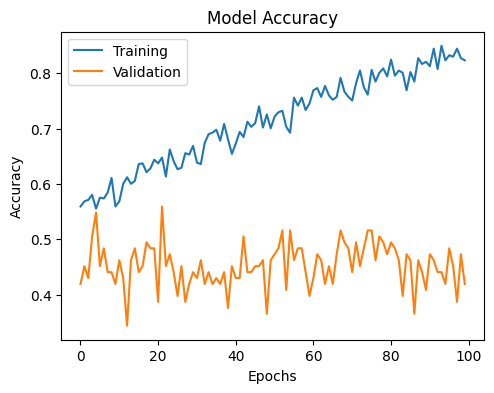

In [19]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

#Plot Loss

Text(0, 0.5, 'Loss')

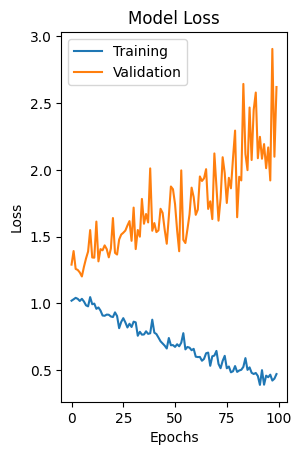

In [20]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

